ROOT histograms

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


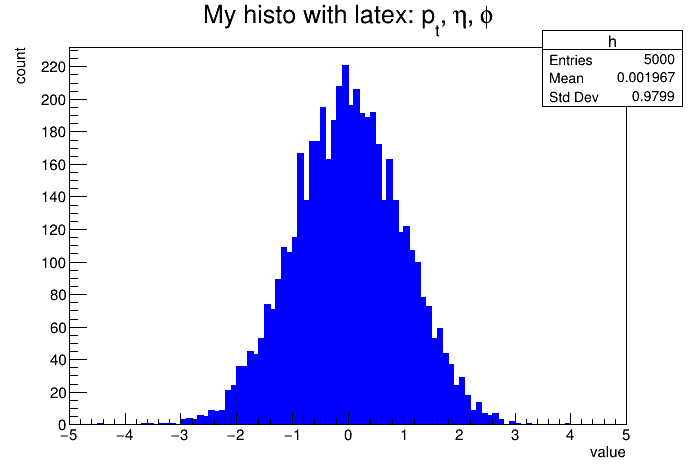

In [26]:
import ROOT
h = ROOT.TH1D(name = "h", title = "My histo", nbinsx = 100, xlow = -5, xup = 5)
h.FillRandom("gaus", ntimes = 5000)

c = ROOT.TCanvas()
h.SetLineColor(ROOT.kBlue)
h.SetFillColor(ROOT.kBlue)
h.GetXaxis().SetTitle("value")
h.GetYaxis().SetTitle("count")
h.SetTitle("My histo with latex: p_{t}, #eta, #phi")
h.Draw()
c.Draw()
# %jsroot off

ROOT functions

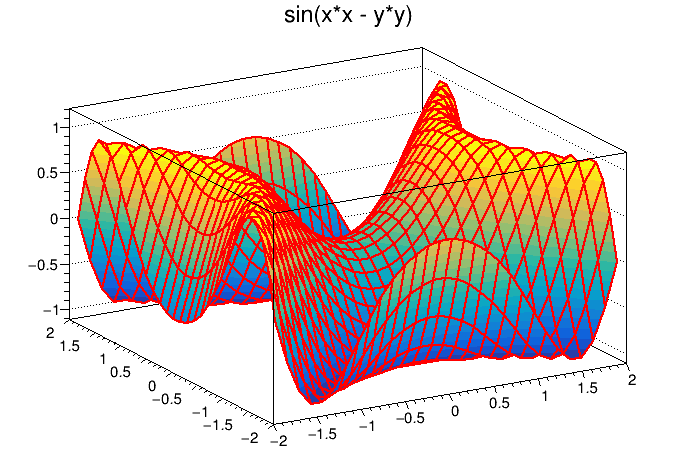

In [27]:
f2 = ROOT.TF2("f2", "sin(x*x - y*y)", xmin = -2, xmax = 2, ymin =-2, ymax = 2)
c = ROOT.TCanvas()
f2.Draw("surf1")
c.Draw()

Fitting a histogram

In [28]:
%%cpp
double gaussian(double *x, double *par) {
    return par[0]*TMath::Exp(-TMath::Power(x[0] - par[1], 2.) / 2.)
           / TMath::Sqrt(2 * TMath::Pi());
}

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      56.5109
NDf                       =           66
Edm                       =  7.29281e-11
NCalls                    =           44
p0                        =      495.359   +/-   7.04538     
p1                        =   0.00669618   +/-   0.0136706   


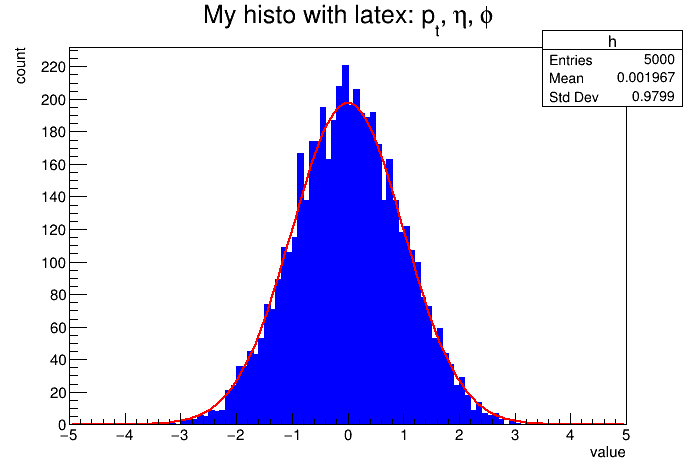

In [29]:
fitFunc = ROOT.TF1("fitFunc", ROOT.gaussian, xmin = -5, xmax = 5, npar = 2)
res = h.Fit(fitFunc, "S")
c2 = ROOT.TCanvas()
h.Draw()
c2.Draw()

In [30]:
%%cpp
cout << "This is a C++ cell" << endl;

This is a C++ cell


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      50.3022
NDf                       =           65
Edm                       =   2.6255e-06
NCalls                    =           53
Constant                  =       202.84   +/-   3.54168     
Mean                      =   0.00672946   +/-   0.0139677   
Sigma                     =     0.975088   +/-   0.0100418    	 (limited)


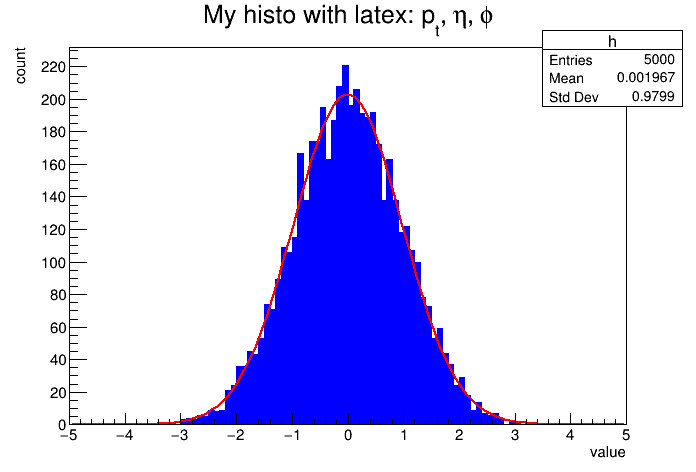

In [31]:
res = h.Fit("gaus", "S")
c3 = ROOT.TCanvas()
h.Draw()
c3.Draw()

ROOT graphs

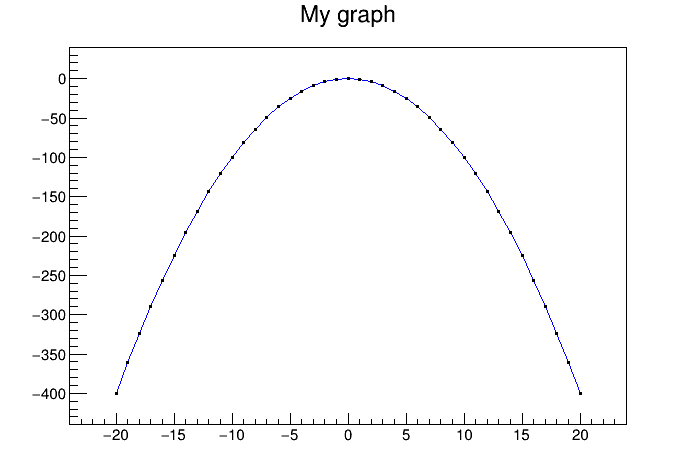

In [32]:
g = ROOT.TGraph()

for x in range(-20, 21):
    y = -x*x
    g.AddPoint(x, y)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
g.SetTitle("My graph")
g.Draw()
c4.Draw()

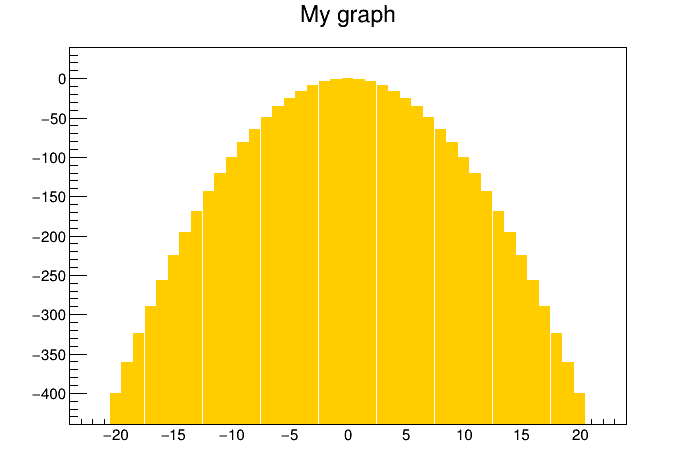

In [33]:
c5 = ROOT.TCanvas()
g.SetTitle("My graph")
g.SetFillColor(ROOT.kOrange)
g.Draw("AB1")
c5.Draw()